In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
cd "/content/drive/My Drive/Colab Notebooks/Time_Series_Projects/Data"

/content/drive/My Drive/Colab Notebooks/Time_Series_Projects/Data


In [3]:
df = pd.read_csv('BeerWineLiquor.csv')

In [4]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [5]:
#Need to be this specific name
df.columns = ['ds','y']

In [6]:
#Need to be datetime
df['ds'] = pd.to_datetime(df['ds'])

In [7]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      324 non-null    datetime64[ns]
 1   y       324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [9]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
#Placeholder to hold future predictions
future = m.make_future_dataframe(periods=24,freq='MS') #MS is Monthly Start

In [11]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [12]:
forecast = m.predict(future)

In [13]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1765.609137,1136.768953,1466.519436,1765.609137,1765.609137,-461.433071,-461.433071,-461.433071,-461.433071,-461.433071,-461.433071,0.0,0.0,0.0,1304.176066
1,1992-02-01,1768.666905,1181.376313,1509.368591,1768.666905,1768.666905,-426.696951,-426.696951,-426.696951,-426.696951,-426.696951,-426.696951,0.0,0.0,0.0,1341.969954
2,1992-03-01,1771.527398,1423.212362,1754.983936,1771.527398,1771.527398,-178.651299,-178.651299,-178.651299,-178.651299,-178.651299,-178.651299,0.0,0.0,0.0,1592.876098
3,1992-04-01,1774.585166,1414.706036,1742.308745,1774.585166,1774.585166,-196.147147,-196.147147,-196.147147,-196.147147,-196.147147,-196.147147,0.0,0.0,0.0,1578.438018
4,1992-05-01,1777.544296,1652.840979,1975.484795,1777.544296,1777.544296,44.823220,44.823220,44.823220,44.823220,44.823220,44.823220,0.0,0.0,0.0,1822.367516


In [14]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [15]:
forecast[['ds','yhat_lower', 'yhat_upper','yhat']]

,ds,yhat_lower,yhat_upper,yhat
0,1992-01-01,1136.768953,1466.519436,1304.176066
1,1992-02-01,1181.376313,1509.368591,1341.969954
2,1992-03-01,1423.212362,1754.983936,1592.876098
3,1992-04-01,1414.706036,1742.308745,1578.438018
4,1992-05-01,1652.840979,1975.484795,1822.367516
...,...,...,...,...
343,2020-08-01,5067.964643,5417.125011,5240.705951
344,2020-09-01,4912.229661,5247.696624,5083.568322
345,2020-10-01,5024.635081,5350.864902,5189.273100
346,2020-11-01,5178.635339,5493.190768,5336.429469


ConversionError: ignored

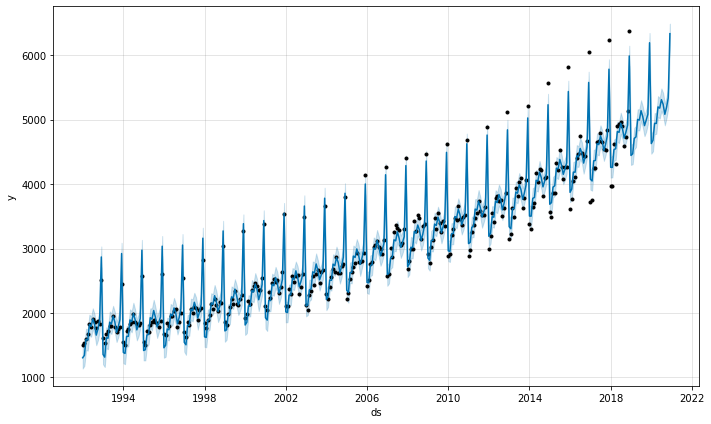

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
m.plot(forecast);
plt.xlim(right = '2021-01-01')